In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import minimize
import plotly.express as px
import plotly.graph_objects as go
import datetime

from sklearn import linear_model as lm
from sklearn.feature_selection import r_regression
from sklearn.metrics import r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
approval = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS-FKWVTTFtJT6u56e0bqdfoMcXvDO1DUChsJ3jQAMB2lZk2SMqVfmg7dGjclTYkYWz-Pm5lfcLPjp4/pub?output=csv')
# approval = approval.reset_index()
# approval = approval.rename({'index':'poll_id'}, axis=1)
approval

,president,subgroup,pollster,sponsors,startdate,enddate,samplesize,population,weight,influence,tracking,approve,disapprove,net,adjusted_approve,adjusted_disapprove,adjusted_net,url,createddate,timestamp
0,Donald Trump (2nd term),Trade,AtlasIntel,NaN,12/15/2025,12/19/2025,2315.0,A,2.050922,1.583896,NaN,35.0,61.0,-26.0,34.42171,61.09238,-26.670670,https://www.atlasintel.org/poll/usa-national-2...,12/19/2025,16:01:07 28 Dec 2025
1,Donald Trump (2nd term),Economy,AtlasIntel,NaN,12/15/2025,12/19/2025,2315.0,A,2.050922,1.583896,NaN,35.0,60.0,-25.0,34.62851,59.97962,-25.351110,https://www.atlasintel.org/poll/usa-national-2...,12/19/2025,16:01:01 28 Dec 2025
2,Donald Trump (2nd term),All polls,AtlasIntel,NaN,12/15/2025,12/19/2025,2315.0,A,2.050922,1.583896,NaN,39.3,59.6,-20.3,39.06337,58.23878,-19.175410,https://www.atlasintel.org/poll/usa-national-2...,12/19/2025,16:00:34 28 Dec 2025
3,Donald Trump (2nd term),Immigration,AtlasIntel,NaN,12/15/2025,12/19/2025,2315.0,A,2.050922,1.583896,NaN,41.0,57.0,-16.0,41.34027,55.33730,-13.997030,https://www.atlasintel.org/poll/usa-national-2...,12/19/2025,16:01:04 28 Dec 2025
4,Donald Trump (2nd term),Adults,AtlasIntel,NaN,12/15/2025,12/19/2025,2315.0,A,2.050922,1.583896,NaN,39.3,59.6,-20.3,38.22596,58.94910,-20.723140,https://www.atlasintel.org/poll/usa-national-2...,12/19/2025,16:00:49 28 Dec 2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,Donald Trump (2nd term),Immigration,Ipsos,Reuters,1/20/2025,1/21/2025,1077.0,A,0.749248,0.000000,NaN,46.0,39.0,7.0,47.87732,39.53010,8.347218,https://www.ipsos.com/en-us/reuters-ipsos-trum...,1/21/2025,16:01:04 28 Dec 2025
3514,Donald Trump (2nd term),Strong,Ipsos,Reuters,1/20/2025,1/21/2025,1077.0,A,0.749248,0.000000,NaN,29.0,29.0,0.0,33.31039,29.07017,4.240221,https://www.ipsos.com/en-us/reuters-ipsos-trum...,1/21/2025,16:00:53 28 Dec 2025
3515,Donald Trump (2nd term),Cost,Ipsos,Reuters,1/20/2025,1/21/2025,1077.0,A,0.996709,0.000000,NaN,35.0,41.0,-6.0,38.42154,41.18378,-2.762241,https://www.ipsos.com/en-us/reuters-ipsos-trum...,1/21/2025,16:01:05 28 Dec 2025
3516,Donald Trump (2nd term),Voters,InsiderAdvantage,NaN,1/20/2025,1/20/2025,800.0,RV,1.093180,0.000000,NaN,56.0,39.0,17.0,52.86094,42.46825,10.392690,https://insideradvantage.com/first-insideradva...,1/20/2025,16:00:44 28 Dec 2025


In [4]:
# approval[approval['pollster']=='YouGov'][approval['subgroup']=='All polls']

In [5]:
approval = approval[~approval['subgroup'].isin(['Weak', 'Strong', 'Economy', 'Cost', 'Immigration', 'Trade', 'Adults', 'All polls'])]

In [6]:
approval.to_csv('trump_approval_polls_RV.csv')

In [7]:
approval.columns.values

array(['president', 'subgroup', 'pollster', 'sponsors', 'startdate',
       'enddate', 'samplesize', 'population', 'weight', 'influence',
       'tracking', 'approve', 'disapprove', 'net', 'adjusted_approve',
       'adjusted_disapprove', 'adjusted_net', 'url', 'createddate',
       'timestamp'], dtype=object)

In [8]:
approval.shape

(624, 20)

In [9]:
# dates = approval['Dates'].str.extract(r'(\d{1,2}\/\d{1,2}) \- (\d{1,2}\/\d{1,2}), (\d{4})')
# dates

In [10]:
# dates['end_date'] = dates[1] + '/' + dates[2]
# dates['end_date'] = pd.to_datetime(dates['end_date'])
# dates

In [11]:
# approval['Dates'] = dates['end_date']
# approval.head()

In [12]:
# samples = approval['Sample'].str.extract(r'[0-9,]{3,5} (\w{1,2})@@(\d{3,4})')
# samples

In [13]:
# approval['population'] = samples[0]
# approval['sample_size'] = samples[1].astype(int)
# approval.head()

In [14]:
ratings = pd.read_csv('pollster_ratings_silver.csv')
ratings

,Pollster,Grade,Predictive Plus-Minus,Mean-reverted bias,Number of polls,cat
0,AtlasIntel,A+@@1,-0.957740,D+0.16@@0.16334188,91,D+
1,Marquette University Law School,A/B@@4,-0.920261,D+0.32@@0.31545374,17,D+
2,The Washington Post,A+@@1,-0.902281,D+0.90@@0.89811021,98,D+
3,Research & Polling Inc.,A@@2,-0.871136,R+0.55@@-0.54944503,44,R+
4,The New York Times/Siena College,A@@2,-0.763947,D+1.41@@1.4121077,116,D+
...,...,...,...,...,...,...
530,Nielson Brothers Polling,C/D@@12,1.946864,D+3.05@@3.0515239,11,D+
531,Ascend Action,C/D@@12,2.282717,D+3.35@@3.3485439,6,D+
532,Jayhawk Consulting Services,C/D@@12,2.353968,D+2.27@@2.2674108,2,D+
533,Fort Hays State University,C/D@@12,2.489170,R+1.10@@-1.0960908,6,R+


In [15]:
ratings['Pollster'].values

array(['AtlasIntel', 'Marquette University Law School',
       'The Washington Post', 'Research & Polling Inc.',
       'The New York Times/Siena College', 'Cygnal', 'SurveyUSA',
       'Siena College', 'Beacon Research/Shaw & Co. Research',
       'Alaska Survey Research', 'OnMessage Inc.', 'TIPP Insights',
       'Emerson College', 'Landmark Communications',
       'Monmouth University', 'Data Orbital',
       'University of North Florida', 'MassINC Polling Group',
       'Marist College', 'Public Policy Institute of California',
       'Public Policy Polling', 'University of California Berkeley',
       'CBS News/The New York Times', 'Christopher Newport University',
       'Mason-Dixon Polling & Strategy', 'Strategic Vision LLC',
       'Suffolk University', 'Stockton University',
       'Field Research Corp. (Field Poll)', 'Quinnipiac University',
       'Los Angeles Times',
       'Hart Research Associates/Public Opinion Strategies',
       'Public Opinion Strategies', 'Susquehan

In [16]:
ratings[ratings['Pollster'].str.contains('North Star')]#.sum()

,Pollster,Grade,Predictive Plus-Minus,Mean-reverted bias,Number of polls,cat
75,North Star Opinion Research,B/C@@8,0.043339,R+0.63@@-0.62697512,13,R+
425,Univision/Latino Decisions/North Star Opinion ...,B/C@@8,0.830409,D+1.06@@1.0564657,7,D+


In [17]:
banned_pollsters = ratings[ratings['Grade'].str.contains('F')]['Pollster'].values
banned_pollsters

array(['Strategic Vision LLC', 'Pharos Research Group', 'Research 2000',
       'Big Data Poll', 'Overtime Politics', 'Rethink Priorities',
       'Blumenthal Research Daily', 'CSP Polling', 'KG Polling',
       'OurProgress (The Progress Campaign)', 'TCJ Research'],
      dtype=object)

In [18]:
approval = approval[~approval['pollster'].isin(banned_pollsters)]
approval.shape

(624, 20)

In [19]:
approval = pd.merge(left=approval, right=ratings[['Pollster', 'Predictive Plus-Minus']], left_on='pollster',
                   right_on='Pollster', how='left')
approval

,president,subgroup,pollster,sponsors,startdate,enddate,samplesize,population,weight,influence,...,disapprove,net,adjusted_approve,adjusted_disapprove,adjusted_net,url,createddate,timestamp,Pollster,Predictive Plus-Minus
0,Donald Trump (2nd term),Voters,InsiderAdvantage,NaN,12/19/2025,12/20/2025,800.0,LV,1.086069,1.024065,...,41.1,8.400002,46.36094,44.56825,1.792690,https://insideradvantage.com/national-trump-ap...,12/20/2025,16:00:44 28 Dec 2025,InsiderAdvantage,0.034562
1,Donald Trump (2nd term),Voters,YouGov,Economist,12/20/2025,12/22/2025,1425.0,RV,0.939350,0.939350,...,56.0,-14.000000,42.53670,55.01410,-12.477400,https://d3nkl3psvxxpe9.cloudfront.net/document...,12/22/2025,16:00:44 28 Dec 2025,YouGov,0.047635
2,Donald Trump (2nd term),Voters,Emerson College,NaN,12/14/2025,12/15/2025,1000.0,RV,1.375719,0.903320,...,50.3,-9.500000,40.84813,52.83953,-11.991400,https://emersoncollegepolling.com/december-202...,12/15/2025,16:00:44 28 Dec 2025,Emerson College,-0.569153
3,Donald Trump (2nd term),Voters,Beacon Research/Shaw & Co. Research,FOX News,12/12/2025,12/15/2025,1001.0,RV,1.409894,0.846650,...,56.0,-12.000000,43.80295,54.90228,-11.099330,https://www.foxnews.com/politics/fox-news-poll...,12/15/2025,16:00:44 28 Dec 2025,Beacon Research/Shaw & Co. Research,-0.635562
4,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/17/2025,12/23/2025,1500.0,LV,0.847648,0.796357,...,54.0,-9.000000,42.22063,55.60864,-13.388010,https://www.rasmussenreports.com/public_conten...,12/23/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Donald Trump (2nd term),Voters,Morning Consult,NaN,1/24/2025,1/26/2025,2302.0,RV,0.795909,0.000000,...,44.0,8.000000,51.13614,44.38465,6.751488,https://pro.morningconsult.com/trackers/donald...,1/26/2025,16:00:44 28 Dec 2025,Morning Consult,0.584994
620,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,1/20/2025,1/24/2025,1500.0,LV,0.213379,0.000000,...,43.0,9.000000,49.22063,44.60864,4.611992,https://www.rasmussenreports.com/public_conten...,1/24/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015
621,Donald Trump (2nd term),Voters,Echelon Insights,NaN,1/22/2025,1/24/2025,1024.0,LV,1.211361,0.000000,...,43.0,8.000000,50.44462,42.81236,7.632259,https://echeloninsights.com/in-the-news/dec-20...,1/24/2025,16:00:44 28 Dec 2025,Echelon Insights,-0.216672
622,Donald Trump (2nd term),Voters,RMG Research,Napolitan News Service,1/20/2025,1/23/2025,3000.0,RV,0.927446,0.000000,...,39.0,18.000000,53.39079,41.68538,11.705410,https://x.com/ScottWRasmussen/status/188280455...,1/23/2025,16:00:44 28 Dec 2025,RMG Research,0.278023


In [20]:
approval.shape

(624, 22)

In [21]:
approval['Pollster'].value_counts()

Pollster
Rasmussen Reports                                     235
YouGov                                                 58
Morning Consult                                        49
RMG Research                                           46
Global Strategy Group/GBAO (Navigator Research)        18
J.L. Partners                                          17
Echelon Insights                                       14
Harris Insights & Analytics                            12
Emerson College                                        12
American Research Group                                11
Quinnipiac University                                  11
John Zogby Strategies                                   9
Clarity Campaign Labs                                   8
Ipsos                                                   7
InsiderAdvantage                                        7
Beacon Research/Shaw & Co. Research                     7
Marist College                                          6
SSRS 

In [22]:
# approval[~approval['tracking'].isna()]

In [23]:
approval['tracking'].value_counts()

tracking
True    235
Name: count, dtype: int64

In [24]:
# full_approval = approval.copy()

In [25]:
approval = approval[(~approval['samplesize'].isna())]
approval

,president,subgroup,pollster,sponsors,startdate,enddate,samplesize,population,weight,influence,...,disapprove,net,adjusted_approve,adjusted_disapprove,adjusted_net,url,createddate,timestamp,Pollster,Predictive Plus-Minus
0,Donald Trump (2nd term),Voters,InsiderAdvantage,NaN,12/19/2025,12/20/2025,800.0,LV,1.086069,1.024065,...,41.1,8.400002,46.36094,44.56825,1.792690,https://insideradvantage.com/national-trump-ap...,12/20/2025,16:00:44 28 Dec 2025,InsiderAdvantage,0.034562
1,Donald Trump (2nd term),Voters,YouGov,Economist,12/20/2025,12/22/2025,1425.0,RV,0.939350,0.939350,...,56.0,-14.000000,42.53670,55.01410,-12.477400,https://d3nkl3psvxxpe9.cloudfront.net/document...,12/22/2025,16:00:44 28 Dec 2025,YouGov,0.047635
2,Donald Trump (2nd term),Voters,Emerson College,NaN,12/14/2025,12/15/2025,1000.0,RV,1.375719,0.903320,...,50.3,-9.500000,40.84813,52.83953,-11.991400,https://emersoncollegepolling.com/december-202...,12/15/2025,16:00:44 28 Dec 2025,Emerson College,-0.569153
3,Donald Trump (2nd term),Voters,Beacon Research/Shaw & Co. Research,FOX News,12/12/2025,12/15/2025,1001.0,RV,1.409894,0.846650,...,56.0,-12.000000,43.80295,54.90228,-11.099330,https://www.foxnews.com/politics/fox-news-poll...,12/15/2025,16:00:44 28 Dec 2025,Beacon Research/Shaw & Co. Research,-0.635562
4,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/17/2025,12/23/2025,1500.0,LV,0.847648,0.796357,...,54.0,-9.000000,42.22063,55.60864,-13.388010,https://www.rasmussenreports.com/public_conten...,12/23/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Donald Trump (2nd term),Voters,Morning Consult,NaN,1/24/2025,1/26/2025,2302.0,RV,0.795909,0.000000,...,44.0,8.000000,51.13614,44.38465,6.751488,https://pro.morningconsult.com/trackers/donald...,1/26/2025,16:00:44 28 Dec 2025,Morning Consult,0.584994
620,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,1/20/2025,1/24/2025,1500.0,LV,0.213379,0.000000,...,43.0,9.000000,49.22063,44.60864,4.611992,https://www.rasmussenreports.com/public_conten...,1/24/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015
621,Donald Trump (2nd term),Voters,Echelon Insights,NaN,1/22/2025,1/24/2025,1024.0,LV,1.211361,0.000000,...,43.0,8.000000,50.44462,42.81236,7.632259,https://echeloninsights.com/in-the-news/dec-20...,1/24/2025,16:00:44 28 Dec 2025,Echelon Insights,-0.216672
622,Donald Trump (2nd term),Voters,RMG Research,Napolitan News Service,1/20/2025,1/23/2025,3000.0,RV,0.927446,0.000000,...,39.0,18.000000,53.39079,41.68538,11.705410,https://x.com/ScottWRasmussen/status/188280455...,1/23/2025,16:00:44 28 Dec 2025,RMG Research,0.278023


In [26]:
auxiliary = pd.read_csv('auxiliary_pollster_rating_stats.csv')
auxiliary

,Pollster,Correct calls,Outside MoE,House effect,ADPA,Herding penalty,herd_cat,p_cat
0,AtlasIntel,0.840659,8.8%@@91.208791,R+2.00@@-1.9990723,3.7@@3.6687982,0.096047,2,R+
1,The Washington Post,0.693878,6.1%@@93.877551,D+1.02@@1.0173736,3.6@@3.5756676,0.221841,3,D+
2,Research & Polling Inc.,0.886364,9.1%@@90.9090906,D+0.63@@0.63289553,4.6@@4.642076,0.286276,3,D+
3,The New York Times/Siena College,0.737069,18.1%@@81.896552,D+0.79@@0.79133403,3.2@@3.2483816,0.280332,3,D+
4,Cygnal,0.939655,13.8%@@86.206897,R+0.60@@-0.59704119,3.5@@3.4644768,0.521310,4,R+
...,...,...,...,...,...,...,...,...
93,Digital Research,0.904762,38.1%@@61.904761,R+2.44@@-2.4431372,11.4@@11.413808,0.000000,1,R+
94,Mitchell Research & Communications,0.695122,39%@@60.975611,R+0.45@@-0.44617203,4.4@@4.4410443,0.229193,3,R+
95,Merriman River Group,0.840000,60%@@39.999998,R+3.23@@-3.2347174,10.3@@10.260222,0.000000,1,R+
96,McLaughlin & Associates,0.689655,34.5%@@65.517241,R+4.94@@-4.9392128,6.2@@6.17804,0.000000,1,R+


In [27]:
# house_eff = auxiliary['House effect'].str.extract(r'(\w)\+(\d\.\d\d)@@*.')
house_eff = auxiliary['House effect'].str.extract(r'(\w)\+\d.\d\d.*@@([\d\.\+\-]+)')
house_eff[1] = house_eff[1].astype(float)
house_eff

,0,1
0,R,-1.999072
1,D,1.017374
2,D,0.632896
3,D,0.791334
4,R,-0.597041
...,...,...
93,R,-2.443137
94,R,-0.446172
95,R,-3.234717
96,R,-4.939213


In [28]:
# R --> -1, D --> 1
house_eff[0] = house_eff[0].replace({'R':-1, 'D':1})
house_eff['house_effect'] = house_eff[1]
house_eff

,0,1,house_effect
0,-1,-1.999072,-1.999072
1,1,1.017374,1.017374
2,1,0.632896,0.632896
3,1,0.791334,0.791334
4,-1,-0.597041,-0.597041
...,...,...,...
93,-1,-2.443137,-2.443137
94,-1,-0.446172,-0.446172
95,-1,-3.234717,-3.234717
96,-1,-4.939213,-4.939213


In [29]:
auxiliary['house_effect'] = house_eff['house_effect']
auxiliary = auxiliary.set_index(['Pollster'])
auxiliary

,Correct calls,Outside MoE,House effect,ADPA,Herding penalty,herd_cat,p_cat,house_effect
Pollster,,,,,,,,
AtlasIntel,0.840659,8.8%@@91.208791,R+2.00@@-1.9990723,3.7@@3.6687982,0.096047,2,R+,-1.999072
The Washington Post,0.693878,6.1%@@93.877551,D+1.02@@1.0173736,3.6@@3.5756676,0.221841,3,D+,1.017374
Research & Polling Inc.,0.886364,9.1%@@90.9090906,D+0.63@@0.63289553,4.6@@4.642076,0.286276,3,D+,0.632896
The New York Times/Siena College,0.737069,18.1%@@81.896552,D+0.79@@0.79133403,3.2@@3.2483816,0.280332,3,D+,0.791334
Cygnal,0.939655,13.8%@@86.206897,R+0.60@@-0.59704119,3.5@@3.4644768,0.521310,4,R+,-0.597041
...,...,...,...,...,...,...,...,...
Digital Research,0.904762,38.1%@@61.904761,R+2.44@@-2.4431372,11.4@@11.413808,0.000000,1,R+,-2.443137
Mitchell Research & Communications,0.695122,39%@@60.975611,R+0.45@@-0.44617203,4.4@@4.4410443,0.229193,3,R+,-0.446172
Merriman River Group,0.840000,60%@@39.999998,R+3.23@@-3.2347174,10.3@@10.260222,0.000000,1,R+,-3.234717


In [30]:
def apply_house_eff(data, pollster):
    df = data[data['pollster']==pollster]
    try:
        df['approve_adj'] = df['approve'] + (auxiliary.loc[pollster, 'house_effect'] / 2)
        df['disapprove_adj'] = df['disapprove'] - (auxiliary.loc[pollster, 'house_effect'] / 2)
    except KeyError:
        df['approve_adj'] = df['approve']
        df['disapprove_adj'] = df['disapprove']
    return df

In [31]:
pollsters = approval['pollster'].value_counts().index.values
df_adjs = []
for p in pollsters:
    df = apply_house_eff(approval, p)
    df_adjs.append(df)

approval_adj = pd.concat(df_adjs, axis=0)
approval_adj

,president,subgroup,pollster,sponsors,startdate,enddate,samplesize,population,weight,influence,...,adjusted_approve,adjusted_disapprove,adjusted_net,url,createddate,timestamp,Pollster,Predictive Plus-Minus,approve_adj,disapprove_adj
4,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/17/2025,12/23/2025,1500.0,LV,0.847648,0.796357,...,42.22063,55.60864,-13.388010,https://www.rasmussenreports.com/public_conten...,12/23/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,44.361664,54.638336
22,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/12/2025,12/18/2025,1500.0,LV,0.332075,0.210714,...,42.22063,54.60864,-12.388010,https://www.rasmussenreports.com/public_conten...,12/18/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,44.361664,53.638336
26,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/15/2025,12/19/2025,1500.0,LV,0.160260,0.121316,...,42.22063,54.60864,-12.388010,https://www.rasmussenreports.com/public_conten...,12/19/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,44.361664,53.638336
27,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/16/2025,12/22/2025,1500.0,LV,0.118919,0.104495,...,41.22063,55.60864,-14.388010,https://www.rasmussenreports.com/public_conten...,12/22/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,43.361664,54.638336
28,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/5/2025,12/11/2025,1500.0,LV,0.330602,0.087436,...,44.22063,52.60864,-8.388008,https://www.rasmussenreports.com/public_conten...,12/11/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,46.361664,51.638336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Donald Trump (2nd term),Voters,The Justice Research Fund,Working Families Power,2/24/2025,3/2/2025,2049.0,RV,1.056150,0.000000,...,47.23736,49.48538,-2.248020,https://drive.google.com/file/d/1psgeNBsAPSV3-...,3/2/2025,16:00:44 28 Dec 2025,NaN,NaN,47.000000,50.000000
376,Donald Trump (2nd term),Voters,RealClear Opinion Research,NaN,4/10/2025,4/12/2025,1000.0,RV,0.916470,0.000000,...,44.45853,45.59446,-1.135929,https://www.yahoo.com/news/rcp-poll-voters-see...,4/12/2025,16:00:44 28 Dec 2025,NaN,NaN,44.200000,43.500000
273,Donald Trump (2nd term),Voters,AP-NORC,NaN,5/1/2025,5/5/2025,1175.0,LV,1.145508,0.000000,...,42.14117,55.39589,-13.254720,https://apnorc.org/wp-content/uploads/2025/05/...,5/5/2025,16:00:44 28 Dec 2025,NaN,NaN,41.000000,57.000000
226,Donald Trump (2nd term),Voters,American Pulse Research & Polling,NaN,6/23/2025,6/25/2025,633.0,RV,0.813438,0.000000,...,48.58723,49.63398,-1.046749,https://s3.amazonaws.com/kajabi-storefronts-pr...,6/25/2025,16:00:44 28 Dec 2025,American Pulse Research & Polling,0.800463,49.700000,48.900000


In [32]:
approval.shape

(623, 22)

In [33]:
approval = approval_adj.copy()
approval.shape

(623, 24)

In [34]:
approval['poll_id'] = pd.factorize(approval['pollster'] + approval['enddate'] + approval['sponsors'].fillna('none'))[0]
approval.head(7)

,president,subgroup,pollster,sponsors,startdate,enddate,samplesize,population,weight,influence,...,adjusted_disapprove,adjusted_net,url,createddate,timestamp,Pollster,Predictive Plus-Minus,approve_adj,disapprove_adj,poll_id
4,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/17/2025,12/23/2025,1500.0,LV,0.847648,0.796357,...,55.60864,-13.388010,https://www.rasmussenreports.com/public_conten...,12/23/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,44.361664,54.638336,0
22,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/12/2025,12/18/2025,1500.0,LV,0.332075,0.210714,...,54.60864,-12.388010,https://www.rasmussenreports.com/public_conten...,12/18/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,44.361664,53.638336,1
26,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/15/2025,12/19/2025,1500.0,LV,0.160260,0.121316,...,54.60864,-12.388010,https://www.rasmussenreports.com/public_conten...,12/19/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,44.361664,53.638336,2
27,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/16/2025,12/22/2025,1500.0,LV,0.118919,0.104495,...,55.60864,-14.388010,https://www.rasmussenreports.com/public_conten...,12/22/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,43.361664,54.638336,3
28,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/5/2025,12/11/2025,1500.0,LV,0.330602,0.087436,...,52.60864,-8.388008,https://www.rasmussenreports.com/public_conten...,12/11/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,46.361664,51.638336,4
29,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/11/2025,12/17/2025,1500.0,LV,0.110212,0.063028,...,54.60864,-11.388010,https://www.rasmussenreports.com/public_conten...,12/17/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,45.361664,53.638336,5
30,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/10/2025,12/16/2025,1500.0,LV,0.109960,0.055934,...,54.60864,-11.388010,https://www.rasmussenreports.com/public_conten...,12/16/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,45.361664,53.638336,6


In [35]:
approval['pollster_id'] = pd.factorize(approval['pollster'] + approval['sponsors'].fillna('none'))[0]

In [36]:
approval['population'] = approval['population'].str.strip(' ')

In [37]:
def pipeline(data: pd.DataFrame):
    dup = data[data.duplicated(subset='poll_id', keep=False)]
    ndup = data[~data.duplicated(subset='poll_id', keep=False)]
    # print('dup', dup, '\n ndup', ndup)
    dup_a = dup[dup['population'].isin(['RV'])]
    # print('dup_a', dup_a)
    df = pd.concat([dup_a, ndup], axis=0)
    
    dup = df[df.duplicated(subset='poll_id', keep=False)]
    ndup = df[~df.duplicated(subset='poll_id', keep=False)]
    dup_lv = dup[dup['population'].isin(['LV'])]
    # print('dup_rv', dup_lv, 'ndup', ndup)
    df = pd.concat([dup_lv, ndup], axis=0)
    
    df['end_date'] = pd.to_datetime(df['end_date'])
    
    return df

In [38]:
approval = approval.rename({'enddate':'end_date', 'samplesize':'sample_size', 'Predictive Plus-Minus':'pred_plus_minus'}, axis=1)

In [39]:
approval['population'].value_counts().index.values

array(['RV', 'LV', 'V'], dtype=object)

In [40]:
approval.shape, pipeline(approval).shape

((623, 26), (619, 26))

In [41]:
pipeline(approval)

,president,subgroup,pollster,sponsors,startdate,end_date,sample_size,population,weight,influence,...,adjusted_net,url,createddate,timestamp,Pollster,pred_plus_minus,approve_adj,disapprove_adj,poll_id,pollster_id
4,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/17/2025,2025-12-23,1500.0,LV,0.847648,0.796357,...,-13.388010,https://www.rasmussenreports.com/public_conten...,12/23/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,44.361664,54.638336,0,0
22,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/12/2025,2025-12-18,1500.0,LV,0.332075,0.210714,...,-12.388010,https://www.rasmussenreports.com/public_conten...,12/18/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,44.361664,53.638336,1,0
26,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/15/2025,2025-12-19,1500.0,LV,0.160260,0.121316,...,-12.388010,https://www.rasmussenreports.com/public_conten...,12/19/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,44.361664,53.638336,2,0
27,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/16/2025,2025-12-22,1500.0,LV,0.118919,0.104495,...,-14.388010,https://www.rasmussenreports.com/public_conten...,12/22/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,43.361664,54.638336,3,0
28,Donald Trump (2nd term),Voters,Rasmussen Reports,NaN,12/5/2025,2025-12-11,1500.0,LV,0.330602,0.087436,...,-8.388008,https://www.rasmussenreports.com/public_conten...,12/11/2025,16:00:44 28 Dec 2025,Rasmussen Reports,0.087015,46.361664,51.638336,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Donald Trump (2nd term),Voters,The Justice Research Fund,Working Families Power,2/24/2025,2025-03-02,2049.0,RV,1.056150,0.000000,...,-2.248020,https://drive.google.com/file/d/1psgeNBsAPSV3-...,3/2/2025,16:00:44 28 Dec 2025,NaN,NaN,47.000000,50.000000,616,69
376,Donald Trump (2nd term),Voters,RealClear Opinion Research,NaN,4/10/2025,2025-04-12,1000.0,RV,0.916470,0.000000,...,-1.135929,https://www.yahoo.com/news/rcp-poll-voters-see...,4/12/2025,16:00:44 28 Dec 2025,NaN,NaN,44.200000,43.500000,617,70
273,Donald Trump (2nd term),Voters,AP-NORC,NaN,5/1/2025,2025-05-05,1175.0,LV,1.145508,0.000000,...,-13.254720,https://apnorc.org/wp-content/uploads/2025/05/...,5/5/2025,16:00:44 28 Dec 2025,NaN,NaN,41.000000,57.000000,618,71
226,Donald Trump (2nd term),Voters,American Pulse Research & Polling,NaN,6/23/2025,2025-06-25,633.0,RV,0.813438,0.000000,...,-1.046749,https://s3.amazonaws.com/kajabi-storefronts-pr...,6/25/2025,16:00:44 28 Dec 2025,American Pulse Research & Polling,0.800463,49.700000,48.900000,619,72


In [42]:
# approval[approval['pollster']=='Harris Insights & Analytics']

In [43]:
full_approval = approval.copy()

In [44]:
approval = approval[approval['tracking'].isna()]

In [45]:
# banned_pollsters_aux = ['Rasmussen Reports', 'co/efficient', 'TIPP Insights', 'Civiqs', 'Trafalgar Group', 'OnMessage Inc.']
banned_pollsters_aux = pd.read_csv('banned_pollsters_aux.csv')['banned_pollsters'].values
banned_pollsters_aux

array(['Rasmussen Reports', 'TIPP Insights', 'Trafalgar Group',
       'Trafalgar Group/Insider Advantage'], dtype=object)

In [46]:
approval = approval[~approval['pollster'].isin(banned_pollsters_aux)]
approval.head()

,president,subgroup,pollster,sponsors,startdate,end_date,sample_size,population,weight,influence,...,adjusted_net,url,createddate,timestamp,Pollster,pred_plus_minus,approve_adj,disapprove_adj,poll_id,pollster_id
1,Donald Trump (2nd term),Voters,YouGov,Economist,12/20/2025,12/22/2025,1425.0,RV,0.939350,0.939350,...,-12.477400,https://d3nkl3psvxxpe9.cloudfront.net/document...,12/22/2025,16:00:44 28 Dec 2025,YouGov,0.047635,42.249587,55.750413,234,2
12,Donald Trump (2nd term),Voters,YouGov,Economist,12/12/2025,12/15/2025,1453.0,RV,0.814446,0.463618,...,-10.477400,https://d3nkl3psvxxpe9.cloudfront.net/document...,12/15/2025,16:00:44 28 Dec 2025,YouGov,0.047635,43.249587,54.750413,235,2
24,Donald Trump (2nd term),Voters,YouGov,Economist,12/5/2025,12/8/2025,1380.0,RV,0.742905,0.176551,...,-9.477398,https://d3nkl3psvxxpe9.cloudfront.net/document...,12/8/2025,16:00:44 28 Dec 2025,YouGov,0.047635,43.249587,53.750413,236,2
31,Donald Trump (2nd term),Voters,YouGov,Economist,11/28/2025,12/1/2025,1456.0,RV,0.706348,0.055443,...,-12.477400,https://d3nkl3psvxxpe9.cloudfront.net/document...,12/1/2025,16:00:44 28 Dec 2025,YouGov,0.047635,42.249587,55.750413,237,2
43,Donald Trump (2nd term),Voters,YouGov,Economist,11/21/2025,11/24/2025,1511.0,RV,0.652057,0.016007,...,-11.477400,https://d3nkl3psvxxpe9.cloudfront.net/document...,11/24/2025,16:00:44 28 Dec 2025,YouGov,0.047635,43.249587,55.750413,238,2


In [47]:
approval[approval['pollster']=='Civiqs']# [['approve', 'disapprove', 'approve_adj', 'disapprove_adj']]

,president,subgroup,pollster,sponsors,startdate,end_date,sample_size,population,weight,influence,...,adjusted_net,url,createddate,timestamp,Pollster,pred_plus_minus,approve_adj,disapprove_adj,poll_id,pollster_id
295,Donald Trump (2nd term),Voters,Civiqs,Daily Kos,5/17/2025,5/20/2025,1018.0,RV,1.120966,0.0,...,-4.339188,https://civiqs.com/documents/Civiqs_DailyKos_b...,5/20/2025,16:00:44 28 Dec 2025,Civiqs,0.158562,47.860928,51.139072,571,45
370,Donald Trump (2nd term),Voters,Civiqs,Daily Kos,4/12/2025,4/15/2025,1124.0,RV,1.149724,0.0,...,-6.339188,https://civiqs.com/reports/2025/04/17/report-a...,4/15/2025,16:00:44 28 Dec 2025,Civiqs,0.158562,46.860928,52.139072,572,45
402,Donald Trump (2nd term),Voters,Civiqs,Daily Kos,2/28/2025,3/3/2025,1031.0,RV,1.124632,0.0,...,-3.339188,https://civiqs.com/reports/2025/03/04/report-a...,3/3/2025,16:00:44 28 Dec 2025,Civiqs,0.158562,48.860928,51.139072,573,45


In [48]:
approval.columns.values

array(['president', 'subgroup', 'pollster', 'sponsors', 'startdate',
       'end_date', 'sample_size', 'population', 'weight', 'influence',
       'tracking', 'approve', 'disapprove', 'net', 'adjusted_approve',
       'adjusted_disapprove', 'adjusted_net', 'url', 'createddate',
       'timestamp', 'Pollster', 'pred_plus_minus', 'approve_adj',
       'disapprove_adj', 'poll_id', 'pollster_id'], dtype=object)

In [49]:
approval_polls = approval[['pollster', 'sponsors', 'startdate', 'end_date', 'sample_size', 'population', 'approve', 'disapprove', 'approve_adj', 'disapprove_adj', 'net', 'url', 'pred_plus_minus', 'poll_id', 'pollster_id']]
approval_polls

,pollster,sponsors,startdate,end_date,sample_size,population,approve,disapprove,approve_adj,disapprove_adj,net,url,pred_plus_minus,poll_id,pollster_id
1,YouGov,Economist,12/20/2025,12/22/2025,1425.0,RV,42.0,56.0,42.249587,55.750413,-14.000000,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,234,2
12,YouGov,Economist,12/12/2025,12/15/2025,1453.0,RV,43.0,55.0,43.249587,54.750413,-12.000000,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,235,2
24,YouGov,Economist,12/5/2025,12/8/2025,1380.0,RV,43.0,54.0,43.249587,53.750413,-11.000000,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,236,2
31,YouGov,Economist,11/28/2025,12/1/2025,1456.0,RV,42.0,56.0,42.249587,55.750413,-14.000000,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,237,2
43,YouGov,Economist,11/21/2025,11/24/2025,1511.0,RV,43.0,56.0,43.249587,55.750413,-13.000000,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,238,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,The Justice Research Fund,Working Families Power,2/24/2025,3/2/2025,2049.0,RV,47.0,50.0,47.000000,50.000000,-3.000000,https://drive.google.com/file/d/1psgeNBsAPSV3-...,NaN,616,69
376,RealClear Opinion Research,NaN,4/10/2025,4/12/2025,1000.0,RV,44.2,43.5,44.200000,43.500000,0.700001,https://www.yahoo.com/news/rcp-poll-voters-see...,NaN,617,70
273,AP-NORC,NaN,5/1/2025,5/5/2025,1175.0,LV,41.0,57.0,41.000000,57.000000,-16.000000,https://apnorc.org/wp-content/uploads/2025/05/...,NaN,618,71
226,American Pulse Research & Polling,NaN,6/23/2025,6/25/2025,633.0,RV,49.7,48.9,49.700000,48.900000,0.799999,https://s3.amazonaws.com/kajabi-storefronts-pr...,0.800463,619,72


In [50]:
approval_polls.shape

(377, 15)

In [51]:
def zone_flood_checker(data, pid, date):
    """
    Check whether there are multiple polls from the same pollster + same sponsor (if applicable) within the last two weeks, 
    which could indicate "flooding the zone." Return number of polls from same pollster/sponsor in last two weeks.

    :param data: Polls dataframe.
    :param pid: Pollster ID, specified in the polls dataframe as the column pollster_id.
    :param date: Date at which specified poll is conducted. Corresponds to column end_date in polls dataframe.
    """
    thres = date - pd.Timedelta(weeks=2)
    df = data[ (data['pollster_id'] == pid) & (pd.to_datetime(data['end_date']) >= thres) ]
    return max(df.shape[0], 1)

In [52]:
def avgs_pipeline(data: pd.DataFrame, date: datetime.date):
    state_pivot = pipeline(data)
    # state_pivot['end_date'] = pd.to_datetime(state_pivot['end_date'])
    # state_pivot['pred_plus_minus'] = state_pivot['pred_plus_minus'].map(lambda x: -x)
    state_pivot = state_pivot[state_pivot['end_date'] <= pd.to_datetime(date)]
    state_pivot['population'] = state_pivot['population'].astype(str).map(lambda x: x.strip())
    
    total_num_polls = state_pivot.shape[0]

    # Sample size weights
    total_sample_size = np.sum(state_pivot['sample_size'])
    state_pivot['sample_size_weights'] = (state_pivot['sample_size'].map(lambda x: np.sqrt(min(x, 3000))) / np.sqrt(np.median(state_pivot['sample_size'].map(lambda x: min(x, 2000)))))
    # print(np.median(state_pivot['sample_size'].map(lambda x: min(x, 5000))))
    state_pivot['sample_size_weights'] /= np.sum(state_pivot['sample_size_weights'])
    
    # Time weights
    # Variation of the equation used here: https://polls.votehub.us/
    latest_date = pd.Timestamp(date)
    delta = state_pivot['end_date'].apply(lambda x: (latest_date - x).days)# (latest_date - state_pivot['end_date']).apply(lambda x: x.days)
    linear_weights = (1 - delta/((latest_date - state_pivot['end_date'].min()).days + 1))
    exp_weights = 0.1**(delta/(30))
    state_pivot['time_weights'] =  0 * linear_weights + 1 * exp_weights
    # state_pivot['time_weights'] /= np.sum(state_pivot['time_weights'])
    
    # Quality weights
    rel_quality = state_pivot['pred_plus_minus']
    def quality_weight(rel_qual):
        if np.isnan(rel_qual): # For pollsters without a quality rating from the Silver Bulletin
            return 0.2
        if rel_qual > 0.5: # Utilizing predictive plus-minus from Silver Bulletin's ratings
            return 0.2
        # return np.sqrt(-rel_qual+1)+0.05
        return np.exp(-rel_qual/1.3)
    state_pivot['quality_weights'] = rel_quality.map(quality_weight)
    # state_pivot['quality_weights'] /= np.sum(state_pivot['quality_weights'])
    
    # Population weights
    def population_weight(population):
        if population == 'RV':
            return 0.8
        return 1
    state_pivot['population_weights'] = state_pivot['population'].map(population_weight)
    # state_pivot['population_weights'] /= np.sum(state_pivot['population_weights'])

   # Multiple polls in short window (aka "flooding the zone")
    def zone_flood_weight(pid, date):
        num_polls = zone_flood_checker(approval_polls, pid, date)
        return 1 / np.sqrt(num_polls)
    state_pivot['zone_flood_weight'] = state_pivot[['pollster_id', 'end_date']].apply(
        lambda x: zone_flood_weight(x['pollster_id'], x['end_date']),
        axis=1
    )

    # Gather the weights together
    state_pivot['total_weights'] = (state_pivot['sample_size_weights'] * state_pivot['time_weights'] * 
                                    state_pivot['quality_weights'] * state_pivot['population_weights'] * state_pivot['zone_flood_weight'])
    state_pivot['total_weights'] /= np.sum(state_pivot['total_weights']) # Normalization step
    
    return state_pivot

In [53]:
approval_polls['sample_size'].isna().any()

False

In [54]:
avgs_pipeline(approval_polls, datetime.datetime.today())

,pollster,sponsors,startdate,end_date,sample_size,population,approve,disapprove,approve_adj,disapprove_adj,...,url,pred_plus_minus,poll_id,pollster_id,sample_size_weights,time_weights,quality_weights,population_weights,zone_flood_weight,total_weights
1,YouGov,Economist,12/20/2025,2025-12-22,1425.0,RV,42.0,56.0,42.249587,55.750413,...,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,234,2,0.002577,6.309573e-01,0.964021,0.8,0.577350,6.122067e-02
12,YouGov,Economist,12/12/2025,2025-12-15,1453.0,RV,43.0,55.0,43.249587,54.750413,...,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,235,2,0.002602,3.686945e-01,0.964021,0.8,0.500000,3.128389e-02
24,YouGov,Economist,12/5/2025,2025-12-08,1380.0,RV,43.0,54.0,43.249587,53.750413,...,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,236,2,0.002536,2.154435e-01,0.964021,0.8,0.447214,1.593453e-02
31,YouGov,Economist,11/28/2025,2025-12-01,1456.0,RV,42.0,56.0,42.249587,55.750413,...,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,237,2,0.002605,1.258925e-01,0.964021,0.8,0.408248,8.730846e-03
43,YouGov,Economist,11/21/2025,2025-11-24,1511.0,RV,43.0,56.0,43.249587,55.750413,...,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,238,2,0.002654,7.356423e-02,0.964021,0.8,0.377964,4.811729e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,The Justice Research Fund,Working Families Power,2/24/2025,2025-03-02,2049.0,RV,47.0,50.0,47.000000,50.000000,...,https://drive.google.com/file/d/1psgeNBsAPSV3-...,NaN,616,69,0.003090,9.261187e-11,0.200000,0.8,1.000000,3.871974e-12
376,RealClear Opinion Research,NaN,4/10/2025,2025-04-12,1000.0,RV,44.2,43.5,44.200000,43.500000,...,https://www.yahoo.com/news/rcp-poll-voters-see...,NaN,617,70,0.002159,2.154435e-09,0.200000,0.8,1.000000,6.292571e-11
273,AP-NORC,NaN,5/1/2025,2025-05-05,1175.0,LV,41.0,57.0,41.000000,57.000000,...,https://apnorc.org/wp-content/uploads/2025/05/...,NaN,618,71,0.002340,1.258925e-08,0.200000,1.0,1.000000,4.982230e-10
226,American Pulse Research & Polling,NaN,6/23/2025,2025-06-25,633.0,RV,49.7,48.9,49.700000,48.900000,...,https://s3.amazonaws.com/kajabi-storefronts-pr...,0.800463,619,72,0.001718,6.309573e-07,0.200000,0.8,1.000000,1.466212e-08


In [55]:
avgs_pipeline(approval_polls, datetime.datetime.today()).shape

(375, 21)

In [56]:
def approval_over_time(data: pd.DataFrame):
    date_range = pd.date_range(start=datetime.date(2025, 1, 23), end=datetime.datetime.today(), freq='d', inclusive='both')
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    for date in date_range:
        pipelined_df = avgs_pipeline(data, date)
        yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
        no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
        yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
        no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
        yes_averages.append(yes_avg)
        no_averages.append(no_avg)
        yes_stdevs.append(yes_std)
        no_stdevs.append(no_std)
    
    return pd.DataFrame({'Date':date_range, 'Approve':yes_averages, 'Disapprove':no_averages}), pd.DataFrame({'Date':date_range, 'Approve':yes_stdevs, 'Disapprove':no_stdevs}), avgs_pipeline(data, datetime.datetime.today())

In [57]:
approval_avg, approval_std, polls_df = approval_over_time(approval_polls)
approval_avg

,Date,Approve,Disapprove
0,2025-01-23,56.212570,39.228331
1,2025-01-24,53.663752,41.072584
2,2025-01-25,53.663752,41.072584
3,2025-01-26,53.593626,41.214518
4,2025-01-27,50.834890,42.261068
...,...,...,...
335,2025-12-24,43.866047,52.565552
336,2025-12-25,43.866047,52.565552
337,2025-12-26,43.866047,52.565552
338,2025-12-27,43.866047,52.565552


In [58]:
polls_df.shape

(375, 21)

In [59]:
polls_df.head(3)

,pollster,sponsors,startdate,end_date,sample_size,population,approve,disapprove,approve_adj,disapprove_adj,...,url,pred_plus_minus,poll_id,pollster_id,sample_size_weights,time_weights,quality_weights,population_weights,zone_flood_weight,total_weights
1,YouGov,Economist,12/20/2025,2025-12-22,1425.0,RV,42.0,56.0,42.249587,55.750413,...,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,234,2,0.002577,0.630957,0.964021,0.8,0.577350,0.061221
12,YouGov,Economist,12/12/2025,2025-12-15,1453.0,RV,43.0,55.0,43.249587,54.750413,...,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,235,2,0.002602,0.368695,0.964021,0.8,0.500000,0.031284
24,YouGov,Economist,12/5/2025,2025-12-08,1380.0,RV,43.0,54.0,43.249587,53.750413,...,https://d3nkl3psvxxpe9.cloudfront.net/document...,0.047635,236,2,0.002536,0.215443,0.964021,0.8,0.447214,0.015935


In [60]:
polls_df['net_adj'] = polls_df['approve_adj'] - polls_df['disapprove_adj']

In [61]:
display_df = polls_df[['pollster', 'sponsors', 'startdate', 'end_date', 'sample_size', 'population', 'approve', 'disapprove', 'net',
                      'total_weights', 'url']]
display_df['sponsors'] = '^Sponsor: ' + display_df['sponsors'] + '^'
display_df['sponsors'] = display_df['sponsors'].fillna('')
display_df = display_df.sort_values(['end_date'], ascending=False)
display_df = display_df.rename({'pollster':'Pollster', 'approve':'Approve', 'disapprove':'Disapprove', 'net':'Net', 'total_weights':'Weight', 'startdate':'Start Date', 'end_date':'End Date', 'url':'URL'}, axis='columns')
display_df['Sample'] = display_df['sample_size'].astype(int).astype(str) + ' ' + display_df['population']
# display_df['end_date'] = display_df['end_date'].map(lambda x: datetime.datetime.strptime(datetime.datetime.fromtimestamp(x), '%m/%d/%Y').strftime('%Y-%m-%d'))
# display_df['Date'] = pd.to_datetime(display_df['startdate']).astype(str) + ' - ' + display_df['end_date'].astype(str)
display_df['Start Date'] = pd.to_datetime(display_df['Start Date']).astype(str)
display_df['End Date'] = display_df['End Date'].astype(str)
display_df = display_df.reset_index()
# display_df = display_df.drop(['sample_size', 'population'], axis='columns')
display_df['Pollster'] = '<a href="' + display_df['URL'] + '" style="color:black; text-decoration:underline;"><u>' + display_df['Pollster'] + '</u></a>' + display_df['sponsors']
# display_df['Pollster'] = '[' + display_df['Pollster'] + '](' + display_df['URL'] + ')'
display_df = display_df[['Pollster', 'Start Date', 'End Date', 'Sample', 'Weight', 'Approve', 'Disapprove', 'Net']]
# display_df = display_df.set_index(['Pollster'])
display_df

,Pollster,Start Date,End Date,Sample,Weight,Approve,Disapprove,Net
0,"<a href=""https://d3nkl3psvxxpe9.cloudfront.net...",2025-12-20,2025-12-22,1425 RV,6.122067e-02,42.0,56.0,-14.000000
1,"<a href=""https://pro.morningconsult.com/tracke...",2025-12-19,2025-12-21,2203 RV,1.462541e-02,45.0,52.0,-7.000000
2,"<a href=""https://insideradvantage.com/national...",2025-12-19,2025-12-20,800 LV,8.604129e-02,49.5,41.1,8.400002
3,"<a href=""https://americanresearchgroup.com/eco...",2025-12-17,2025-12-20,999 RV,1.579832e-02,35.0,62.0,-27.000000
4,"<a href=""https://napolitannews.org/jobapproval...",2025-12-10,2025-12-18,3000 RV,5.473330e-02,50.0,49.0,1.000000
...,...,...,...,...,...,...,...,...
370,"<a href=""https://mclaughlinonline.com/pols/wp-...",2025-01-22,2025-01-27,1000 LV,1.758827e-13,52.0,43.0,9.000000
371,"<a href=""https://pro.morningconsult.com/tracke...",2025-01-24,2025-01-26,2302 RV,4.035774e-14,52.0,44.0,8.000000
372,"<a href=""https://echeloninsights.com/in-the-ne...",2025-01-22,2025-01-24,1024 LV,3.275447e-13,51.0,43.0,8.000000
373,"<a href=""https://x.com/ScottWRasmussen/status/...",2025-01-20,2025-01-23,3000 RV,1.509269e-13,57.0,39.0,18.000000


In [62]:
display_df.to_csv('polls_display_table_RV.csv')

In [63]:
approval_std

,Date,Approve,Disapprove
0,2025-01-23,0.758850,0.262355
1,2025-01-24,2.661521,1.894681
2,2025-01-25,2.661521,1.894681
3,2025-01-26,2.600537,1.928781
4,2025-01-27,3.815328,2.050034
...,...,...,...
335,2025-12-24,3.279952,4.269444
336,2025-12-25,3.279952,4.269444
337,2025-12-26,3.279952,4.269444
338,2025-12-27,3.279952,4.269444


In [64]:
approval_avg['Net'] = approval_avg['Approve'] - approval_avg['Disapprove']
approval_avg

,Date,Approve,Disapprove,Net
0,2025-01-23,56.212570,39.228331,16.984238
1,2025-01-24,53.663752,41.072584,12.591169
2,2025-01-25,53.663752,41.072584,12.591169
3,2025-01-26,53.593626,41.214518,12.379108
4,2025-01-27,50.834890,42.261068,8.573823
...,...,...,...,...
335,2025-12-24,43.866047,52.565552,-8.699506
336,2025-12-25,43.866047,52.565552,-8.699506
337,2025-12-26,43.866047,52.565552,-8.699506
338,2025-12-27,43.866047,52.565552,-8.699506


In [65]:
approval_trendline = pd.merge(left=approval_avg, right=approval_std, left_on='Date', right_on='Date', how='inner')
approval_trendline['approve_CI_upper'] = approval_trendline['Approve_x'] + 1.96*approval_trendline['Approve_y']
approval_trendline['approve_CI_lower'] = approval_trendline['Approve_x'] - 1.96*approval_trendline['Approve_y']
approval_trendline['disapprove_CI_upper'] = approval_trendline['Disapprove_x'] + 1.96*approval_trendline['Disapprove_y']
approval_trendline['disapprove_CI_lower'] = approval_trendline['Disapprove_x'] - 1.96*approval_trendline['Disapprove_y']
approval_trendline = approval_trendline.rename({
    'Approve_x':'approve_mean',
    'Disapprove_x':'disapprove_mean',
}, axis='columns').drop(['Approve_y', 'Disapprove_y', 'Net'], axis='columns')
approval_trendline

,Date,approve_mean,disapprove_mean,approve_CI_upper,approve_CI_lower,disapprove_CI_upper,disapprove_CI_lower
0,2025-01-23,56.212570,39.228331,57.699915,54.725224,39.742546,38.714116
1,2025-01-24,53.663752,41.072584,58.880333,48.447171,44.786159,37.359009
2,2025-01-25,53.663752,41.072584,58.880333,48.447171,44.786159,37.359009
3,2025-01-26,53.593626,41.214518,58.690677,48.496574,44.994929,37.434106
4,2025-01-27,50.834890,42.261068,58.312934,43.356846,46.279134,38.243001
...,...,...,...,...,...,...,...
335,2025-12-24,43.866047,52.565552,50.294753,37.437340,60.933662,44.197442
336,2025-12-25,43.866047,52.565552,50.294753,37.437340,60.933662,44.197442
337,2025-12-26,43.866047,52.565552,50.294753,37.437340,60.933662,44.197442
338,2025-12-27,43.866047,52.565552,50.294753,37.437340,60.933662,44.197442


In [66]:
# Export approval ratings
approval_trendline.to_csv('approval_stats_RV.csv')

In [67]:
polls_df.shape

(375, 22)

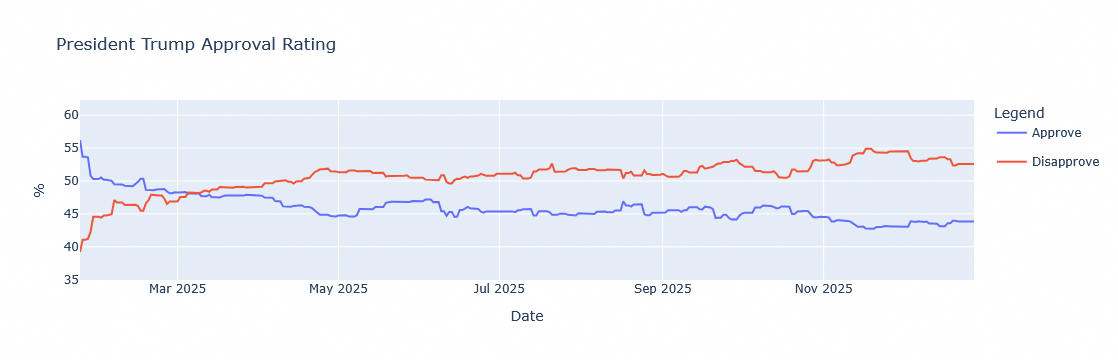

In [68]:
line = px.line(approval_avg, x='Date', y=['Approve', 'Disapprove'])
# scatter = px.scatter(polls_df[polls_df['end_date'] >= pd.to_datetime('2025-01-24')], x='end_date', y=['approve', 'disapprove'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
# scatter.update_traces(hovertemplate=None, hoverinfo='skip')
fig_approve_CI = go.Figure([
    go.Scatter(
        name='Approve CI Upper Bound',
        x = approval_avg['Date'],
        y = approval_avg['Approve'] + 1.96*approval_std['Approve'],
        mode='lines',
        marker=dict(color='#8be8f2'),
        line=dict(width=0),
        showlegend=False,
        hoverinfo='skip'
    ),
    go.Scatter(
        name='Approve CI Lower Bound',
        x = approval_avg['Date'],
        y = approval_avg['Approve'] - 1.96*approval_std['Approve'],
        mode='lines',
        marker=dict(color='#8be8f2'),
        line=dict(width=0),
        showlegend=False,
        hoverinfo='skip'
    ),  
])
fig_disapprove_CI = go.Figure([
    go.Scatter(
        name='Disapprove CI Upper Bound',
        x = approval_avg['Date'],
        y = approval_avg['Disapprove'] + 1.96*approval_std['Disapprove'],
        mode='lines',
        marker=dict(color='#a3cbec'),
        line=dict(width=0),
        showlegend=False,
        hoverinfo='skip'
    ),
    go.Scatter(
        name='Disapprove CI Lower Bound',
        x = approval_avg['Date'],
        y = approval_avg['Disapprove'] - 1.96*approval_std['Disapprove'],
        mode='lines',
        marker=dict(color='#a3cbec'),
        line=dict(width=0),
        showlegend=False,
        hoverinfo='skip'
    ),  
])

fig = go.Figure(data=line.data + fig_approve_CI.data + fig_disapprove_CI.data)
fig.update_layout(
    title='President Trump Approval Rating',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.show()

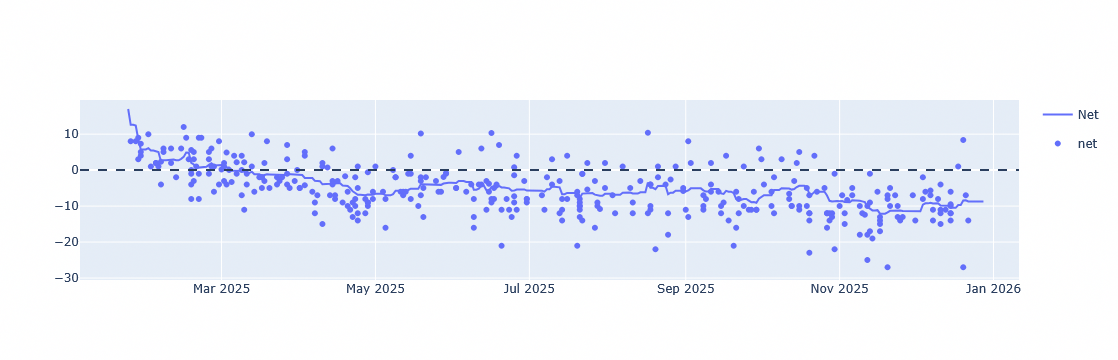

In [69]:
line = px.line(approval_avg, x='Date', y=['Net'])
scatter = px.scatter(polls_df[polls_df['end_date'] >= pd.to_datetime('2025-01-24')], x='end_date', y=['net'])
                     #trendline='lowess', trendline_options=dict(frac=0.2))
fig = go.Figure(data=line.data + scatter.data)
fig.add_hline(y=0, line_dash='dash')
fig.show()

In [70]:
# scatter = px.scatter(polls_df[polls_df['end_date'] >= pd.to_datetime('2025-01-24')], x='end_date', y=['net', 'net_adj'])
# fig = go.Figure(data=scatter.data)
# fig.add_hline(y=0, line_dash='dash')
# fig.show()

In [71]:
def net_col(df: pd.DataFrame, min_date: datetime.date):
#     df_copy = df.set_index(['Date'])
#     return df_copy['approve_mean'] - df_copy['disapprove_mean']
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    data = df.copy()
    data['net_adj'] = data['approve_adj'] - data['disapprove_adj']
    net_averages = []
    net_stdevs = []
    issue_cols = {'Date': date_range, 'net':[], 'net_std':[]}
    for date in date_range:
    #         try:
            pipelined_df = avgs_pipeline(data, date)
    #         except TypeError:
    #             print('TypeError')
    #             print(date)
            net_avg = np.sum(pipelined_df['net_adj'] * pipelined_df['total_weights'])
            net_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['net_adj'] - net_avg)**2))

            net_averages.append(net_avg)
            net_stdevs.append(net_std)

    issue_cols['net'].extend(net_averages)
    issue_cols[f'net_std'].extend(net_stdevs)
        
    net_averages, net_stdevs = [], []
        
    return pd.DataFrame(issue_cols)

In [72]:
net_approval = net_col(approval, datetime.date(2025, 1, 23))
net_approval

,Date,net,net_std
0,2025-01-23,16.984238,1.021204
1,2025-01-24,12.591169,4.549973
2,2025-01-25,12.591169,4.549973
3,2025-01-26,12.379108,4.502473
4,2025-01-27,8.573823,5.473213
...,...,...,...
335,2025-12-24,-8.699506,6.885806
336,2025-12-25,-8.699506,6.885806
337,2025-12-26,-8.699506,6.885806
338,2025-12-27,-8.699506,6.885806


In [73]:
net_approval['net_upper_CI'] = net_approval['net'] + 1.96*net_approval['net_std']
net_approval['net_lower_CI'] = net_approval['net'] - 1.96*net_approval['net_std']
net_approval

,Date,net,net_std,net_upper_CI,net_lower_CI
0,2025-01-23,16.984238,1.021204,18.985799,14.982678
1,2025-01-24,12.591169,4.549973,21.509115,3.673222
2,2025-01-25,12.591169,4.549973,21.509115,3.673222
3,2025-01-26,12.379108,4.502473,21.203955,3.554261
4,2025-01-27,8.573823,5.473213,19.301320,-2.153675
...,...,...,...,...,...
335,2025-12-24,-8.699506,6.885806,4.796675,-22.195686
336,2025-12-25,-8.699506,6.885806,4.796675,-22.195686
337,2025-12-26,-8.699506,6.885806,4.796675,-22.195686
338,2025-12-27,-8.699506,6.885806,4.796675,-22.195686


In [74]:
net_approval.to_csv('net_approval_RV.csv')

### Auxiliary Graph: Individual Pollsters

In [76]:
approval_polls.columns.values

array(['pollster', 'sponsors', 'startdate', 'end_date', 'sample_size',
       'population', 'approve', 'disapprove', 'approve_adj',
       'disapprove_adj', 'net', 'url', 'pred_plus_minus', 'poll_id',
       'pollster_id'], dtype=object)

In [77]:
appr = full_approval.copy()
appr['net_adj'] = appr['approve'] - appr['disapprove']
appr = appr[~appr['pred_plus_minus'].isna()]
pollsters = appr['pollster'].value_counts().index.values
pollsters

array(['Rasmussen Reports', 'YouGov', 'Morning Consult', 'RMG Research',
       'Global Strategy Group/GBAO (Navigator Research)', 'J.L. Partners',
       'Echelon Insights', 'Harris Insights & Analytics',
       'Emerson College', 'American Research Group',
       'Quinnipiac University', 'John Zogby Strategies',
       'Clarity Campaign Labs', 'InsiderAdvantage', 'Ipsos',
       'Beacon Research/Shaw & Co. Research', 'SSRS', 'Marist College',
       'McLaughlin & Associates', 'Marquette University Law School',
       'TIPP Insights', 'Cygnal', 'GBAO',
       'Fabrizio Lee & Associates/Impact Research', 'co/efficient',
       'Targoz Market Research', 'Civiqs', 'Wick',
       'Hart Research Associates/Public Opinion Strategies',
       'Trafalgar Group', 'The New York Times/Siena College',
       'OH Predictive Insights', 'The Winston Group', 'NewsNation',
       'Blueprint Polling', 'High Point University',
       'Normington, Petts & Associates', 'OnMessage Inc.',
       'Remington 

In [78]:
def approval_today(data: pd.DataFrame):
    # date_range = pd.date_range(start=datetime.date(2025, 1, 23), end=datetime.datetime.today(), freq='d', inclusive='both')
#     yes_averages = []
#     no_averages = []
#     yes_stdevs = []
#     no_stdevs = []
    pipelined_df = avgs_pipeline(data, datetime.datetime.today())
    yes_avg = np.sum(pipelined_df['approve'] * pipelined_df['total_weights'])
    no_avg = np.sum(pipelined_df['disapprove'] * pipelined_df['total_weights'])
    yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve'] - yes_avg)**2))
    no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove'] - no_avg)**2))
    net_avg = np.sum(pipelined_df['net'] * pipelined_df['total_weights'])
    net_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['net'] - net_avg)**2))
    
    #return pd.DataFrame({'Date':date_range, 'Approve':yes_averages, 'Disapprove':no_averages}), pd.DataFrame({'Date':date_range, 'Approve':yes_stdevs, 'Disapprove':no_stdevs}), avgs_pipeline(data, datetime.datetime.today())
    return yes_avg, no_avg, yes_std, no_std, net_avg, net_std

In [79]:
def indiv_pollster_avg(pollster: str):
    df = appr[appr['pollster'] == pollster]
    yes_avg, no_avg, yes_std, no_std, net_avg, net_std = approval_today(df)
    return yes_avg, no_avg, yes_std, no_std, net_avg, net_std

In [80]:
def get_ppm(pollster: str):
    df = ratings[ratings['Pollster'] == pollster]
    ppm = df['Predictive Plus-Minus'].values[0]
    
    return ppm

In [81]:
appr.shape

(592, 27)

In [82]:
def get_num_polls(pollster: str):
    df = appr[appr['pollster'] == pollster]
    num_polls = df.shape[0]
    return num_polls

In [83]:
get_ppm('YouGov')

0.047635015

In [84]:
indiv_pollster_avg('YouGov')

(42.5802437998973,
 55.35863147695051,
 0.6361807600445671,
 0.7864031555207032,
 -12.77838767705321,
 1.3720149163616795)

In [85]:
indiv_pollster_avg('RMG Research')

(48.198052314188956,
 50.333336339980114,
 1.9464040500981874,
 1.5442252094350775,
 -2.1352840257911607,
 3.472591842656573)

In [86]:
nets = []
net_stdevs = []
ppms = []
nums = []

for p in pollsters:
    _, _, _, _, net, net_std = indiv_pollster_avg(p)
    ppm = get_ppm(p)
    num_polls = get_num_polls(p)
    
    nets.append(net)
    net_stdevs.append(net_std)
    ppms.append(ppm)
    nums.append(num_polls)

In [87]:
# nets

In [88]:
indiv_avgs = pd.DataFrame({'Pollster': pollsters, 'Net Approval': nets, 'Net Stdev': net_stdevs, 'Predictive Plus-Minus': ppms, 'Number of Approval Polls Conducted': nums})
indiv_avgs = indiv_avgs.sort_values(['Net Approval'], ascending=True)
indiv_avgs

,Pollster,Net Approval,Net Stdev,Predictive Plus-Minus,Number of Approval Polls Conducted
9,American Research Group,-26.977330,0.309123,0.818141,11
16,SSRS,-21.998431,0.125238,0.966835,6
35,High Point University,-18.999130,0.088491,0.411680,2
14,Ipsos,-16.610781,2.006344,0.442898,7
17,Marist College,-15.203043,0.640681,-0.436610,6
4,Global Strategy Group/GBAO (Navigator Research),-14.202817,0.984215,0.804988,18
10,Quinnipiac University,-14.002256,0.072813,-0.290484,11
33,NewsNation,-13.000000,0.000656,0.614459,2
22,GBAO,-12.999847,0.024751,0.384788,3
1,YouGov,-12.778388,1.372015,0.047635,58


In [89]:
# indiv_avgs.to_csv('indiv_pollster_avgs_RV.csv')

In [90]:
reg = lm.LinearRegression()
reg.fit(indiv_avgs[['Predictive Plus-Minus']], indiv_avgs['Net Approval'])
reg.coef_, reg.intercept_

(array([-2.98352811]), -7.376595007931938)

In [91]:
r = r_regression(indiv_avgs[['Predictive Plus-Minus']], indiv_avgs['Net Approval'])
r

array([-0.21988878])